# <font color=darkturquoise>Air Quality Statistics Report(USA)

- Air Quality Statistics Report(USA) : 미국의 대기질 통계 보고서


- 데이터 출처 :
[EPA-Air Quality Statistics Report](https://www.epa.gov/outdoor-air-quality-data/air-quality-statistics-report)


- 데이터 설명 : 미국의 주, 도시마다 일산화탄소(CO), 이산화질소(NO2), 오존(Ozone), 이산화황(SO2), 미세먼지(PM10), 초미세먼지(PM2.5)의 최댓값과 평균을 측정했다.



- EPA(United States <font color=red>E<font color=black>nvironmental <font color=red>P<font color=black>rotection <font color=red>A<font color=black>gency<font color=black>)


    - 1960년대부터 미국의 환경보호에 대한 인식이 높아짐
    
    - 1970년대 초 도시 공기 악화, 잔해로 뒤덮인 자연 지역, 위험한 불순물로 오염된 도시 상수도에 대한 대중의 우려가 높아짐에 따라 Richard Nixon 대통령은 환경에 대한 37개 메시지를 하원과 상원에 발표
    
    - 또한 닉슨 대통령은 그의 메시지에 제시된 환경에 대한 목표를 효율적으로 다룰 수 있도록 오염을 줄이기 위해 고안된 연방 정부 프로그램을 조직하는 방법을 생각하기 위해 부분적으로 위원회를 만들었음
    
    - 위원회의 권고에 따라 대통령은 연방 정부의 많은 환경적 책임을 하나의 기관인 새로운 환경 보호 기관으로 통합하기 위한 계획을 의회에 보냄
    
    - 그해 여름에 청문회를 실시 후 하원과 상원은 제안을 승인함. 1970년 12월 4일 기관의 첫 번째 관리자인 William Ruckelshaus가 취임
    
↑ 참고: [The Origins of EPA: EPA의 기원](https://www.epa.gov/history/origins-epa)

In [1]:
from IPython.display import Image

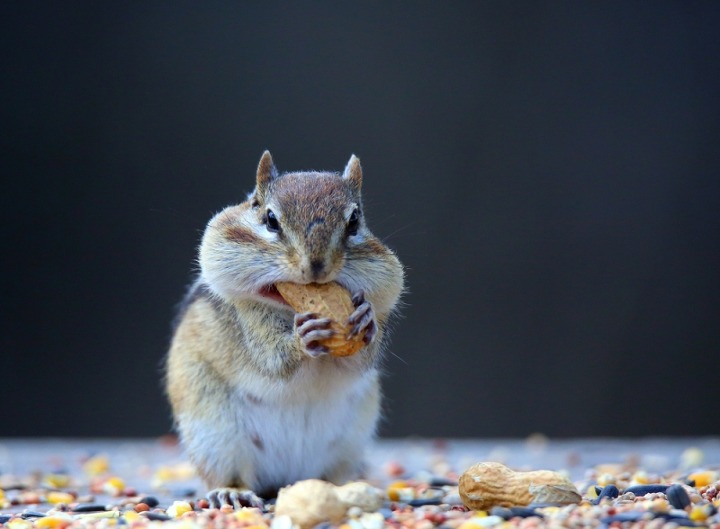

In [2]:
Image('https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/4arX/image/FToC1jQw1U0mAhJYnEmTPg7ZQD8.jpg')

## 1. 데이터 탐색

In [3]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 데이터 로드
air_con = pd.read_csv('C:/Users/User/Downloads/conreport2021.csv')

In [5]:
air_con.head()

,CBSA Code,CBSA,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
0,10300,"Adrian, MI",.,.,.,.,0.07,0.066,.,.,.,.,.,.,.,.
1,10420,"Akron, OH",.,.,.,.,0.08,0.067,5,3,0,24,9.3,.,.,.
2,10500,"Albany, GA",.,.,.,.,.,.,.,.,.,33,10.9,.,.,.
3,10580,"Albany-Schenectady-Troy, NY",.,.,.,.,0.07,0.062,2,1,0,22,8.1,.,.,.
4,10740,"Albuquerque, NM",2.2,1,44,8,0.09,0.076,3,1,1,28,11.3,221,52,.


- 결측치가 '.'으로 채워져 있음

In [6]:
air_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CBSA Code                    407 non-null    int64 
 1   CBSA                         407 non-null    object
 2   CO 2nd Max 1-hr              407 non-null    object
 3   CO 2nd Max 8-hr              407 non-null    object
 4   NO2 98th Percentile 1-hr     407 non-null    object
 5   NO2 Mean 1-hr                407 non-null    object
 6   Ozone 2nd Max 1-hr           407 non-null    object
 7   Ozone 4th Max 8-hr           407 non-null    object
 8   SO2 99th Percentile 1-hr     407 non-null    object
 9   SO2 2nd Max 24-hr            407 non-null    object
 10  SO2 Mean 1-hr                407 non-null    object
 11  PM2.5 98th Percentile 24-hr  407 non-null    object
 12  PM2.5 Weighted Mean 24-hr    407 non-null    object
 13  PM10 2nd Max 24-hr           407 no

In [7]:
# 결측치 '.'을 0으로 바꾸기
air_con = air_con.replace('.', 0)

In [8]:
air_con.head()

,CBSA Code,CBSA,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
0,10300,"Adrian, MI",0,0,0,0,0.07,0.066,0,0,0,0,0,0,0,0
1,10420,"Akron, OH",0,0,0,0,0.08,0.067,5,3,0,24,9.3,0,0,0
2,10500,"Albany, GA",0,0,0,0,0,0,0,0,0,33,10.9,0,0,0
3,10580,"Albany-Schenectady-Troy, NY",0,0,0,0,0.07,0.062,2,1,0,22,8.1,0,0,0
4,10740,"Albuquerque, NM",2.2,1,44,8,0.09,0.076,3,1,1,28,11.3,221,52,0


- CBSA : 도시, 주

In [9]:
cols = ['CO 2nd Max 1-hr', 'CO 2nd Max 8-hr', 'NO2 98th Percentile 1-hr', 'NO2 Mean 1-hr', 'Ozone 2nd Max 1-hr', 
        'Ozone 4th Max 8-hr', 'SO2 99th Percentile 1-hr', 'SO2 2nd Max 24-hr', 'SO2 Mean 1-hr',
        'PM2.5 98th Percentile 24-hr', 'PM2.5 Weighted Mean 24-hr', 'PM10 2nd Max 24-hr', 'PM10 Mean 24-hr',
        'Lead Max 3-Mo Avg']

air_con[cols] = air_con[cols].astype(float)

In [10]:
air_con.dtypes

CBSA Code                        int64
CBSA                            object
CO 2nd Max 1-hr                float64
CO 2nd Max 8-hr                float64
NO2 98th Percentile 1-hr       float64
NO2 Mean 1-hr                  float64
Ozone 2nd Max 1-hr             float64
Ozone 4th Max 8-hr             float64
SO2 99th Percentile 1-hr       float64
SO2 2nd Max 24-hr              float64
SO2 Mean 1-hr                  float64
PM2.5 98th Percentile 24-hr    float64
PM2.5 Weighted Mean 24-hr      float64
PM10 2nd Max 24-hr             float64
PM10 Mean 24-hr                float64
Lead Max 3-Mo Avg              float64
dtype: object

In [11]:
air_con.describe()

,CBSA Code,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,30311.031941,0.562899,0.385012,5.095823,1.855037,0.066216,0.053850,3.683047,1.179361,0.154791,10.837838,3.918673,15.769042,4.233415,0.001916
std,11504.001742,2.244813,1.571027,13.374233,4.502995,0.033165,0.026298,12.478564,4.224578,0.489415,13.589269,4.568946,43.310094,9.777680,0.016838
min,10300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20020.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.058000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30340.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.063000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40300.000000,0.700000,0.550000,0.000000,0.000000,0.080000,0.067000,0.000000,0.000000,0.000000,22.000000,8.600000,0.000000,0.000000,0.000000
max,49740.000000,41.600000,29.700000,59.000000,29.000000,0.350000,0.112000,94.000000,48.000000,4.000000,70.000000,20.000000,439.000000,60.000000,0.300000


In [12]:
# 납 농도 최빈값
air_con['Lead Max 3-Mo Avg'].value_counts().idxmax()

0.0

In [13]:
# 필요없는 열 삭제
d_cols = ['CBSA Code', 'Lead Max 3-Mo Avg']
air_con = air_con.drop(d_cols, axis=1)

- Lead Max 3-Mo Avg(3개월 납 농도 평균)는 최빈값이 0이라서 크게 의미없다고 생각하여 삭제
- CBSA Code는 unique한 값, 큰 의미가 없는 단순 코드여서 삭제

In [14]:
air_con.columns

Index(['CBSA', 'CO 2nd Max 1-hr', 'CO 2nd Max 8-hr',
       'NO2 98th Percentile 1-hr', 'NO2 Mean 1-hr', 'Ozone 2nd Max 1-hr',
       'Ozone 4th Max 8-hr', 'SO2 99th Percentile 1-hr', 'SO2 2nd Max 24-hr',
       'SO2 Mean 1-hr', 'PM2.5 98th Percentile 24-hr',
       'PM2.5 Weighted Mean 24-hr', 'PM10 2nd Max 24-hr', 'PM10 Mean 24-hr'],
      dtype='object')

In [15]:
# CBSA열을 city, state열로 나누기
air_con['City'] = air_con['CBSA'].str.split(',').str[0]

In [16]:
air_con['State'] = air_con['CBSA'].str.split(',').str[1]

In [17]:
air_con.head()

,CBSA,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,City,State
0,"Adrian, MI",0.0,0.0,0.0,0.0,0.07,0.066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adrian,MI
1,"Akron, OH",0.0,0.0,0.0,0.0,0.08,0.067,5.0,3.0,0.0,24.0,9.3,0.0,0.0,Akron,OH
2,"Albany, GA",0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,33.0,10.9,0.0,0.0,Albany,GA
3,"Albany-Schenectady-Troy, NY",0.0,0.0,0.0,0.0,0.07,0.062,2.0,1.0,0.0,22.0,8.1,0.0,0.0,Albany-Schenectady-Troy,NY
4,"Albuquerque, NM",2.2,1.0,44.0,8.0,0.09,0.076,3.0,1.0,1.0,28.0,11.3,221.0,52.0,Albuquerque,NM


In [18]:
# CBSA 삭제(분리했으므로)
air_con = air_con.drop('CBSA', axis=1)

In [19]:
air_con.head()

,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,City,State
0,0.0,0.0,0.0,0.0,0.07,0.066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adrian,MI
1,0.0,0.0,0.0,0.0,0.08,0.067,5.0,3.0,0.0,24.0,9.3,0.0,0.0,Akron,OH
2,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,33.0,10.9,0.0,0.0,Albany,GA
3,0.0,0.0,0.0,0.0,0.07,0.062,2.0,1.0,0.0,22.0,8.1,0.0,0.0,Albany-Schenectady-Troy,NY
4,2.2,1.0,44.0,8.0,0.09,0.076,3.0,1.0,1.0,28.0,11.3,221.0,52.0,Albuquerque,NM


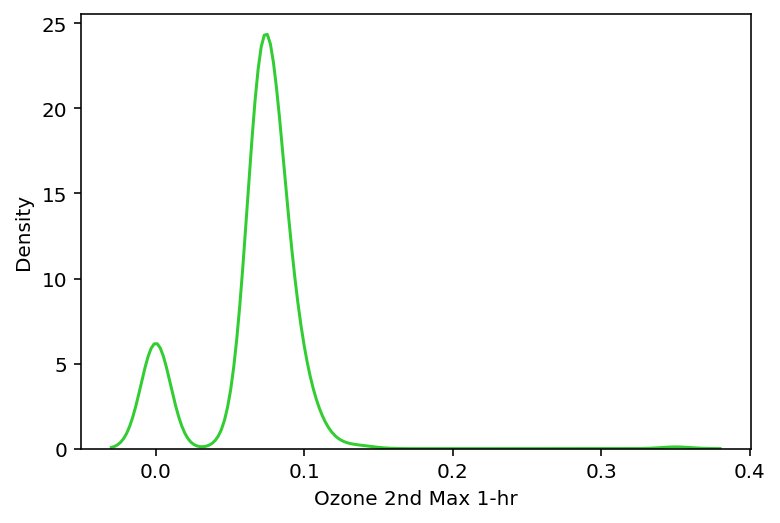

In [20]:
sns.kdeplot(air_con['Ozone 2nd Max 1-hr'], color='limegreen')
plt.show()

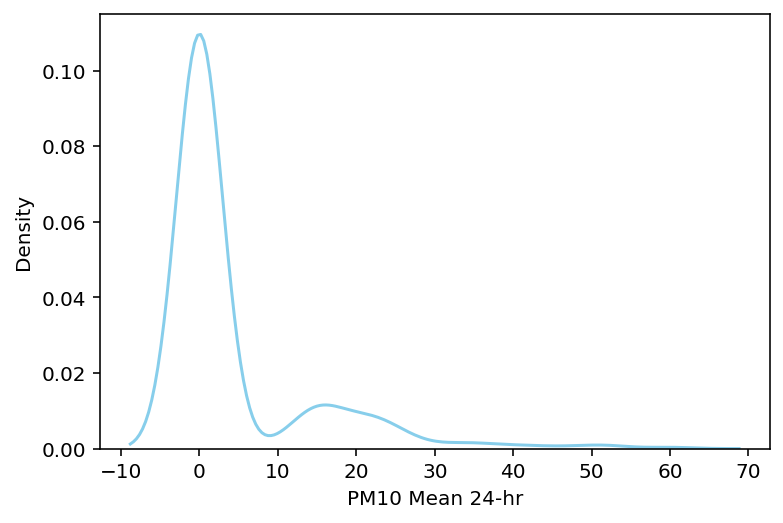

In [21]:
sns.kdeplot(air_con['PM10 Mean 24-hr'], color='skyblue')
plt.show()

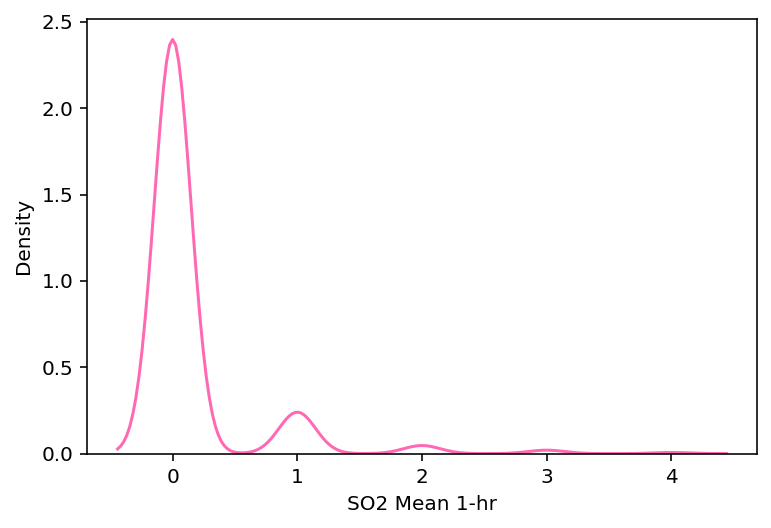

In [22]:
sns.kdeplot(air_con['SO2 Mean 1-hr'], color='hotpink')
plt.show()

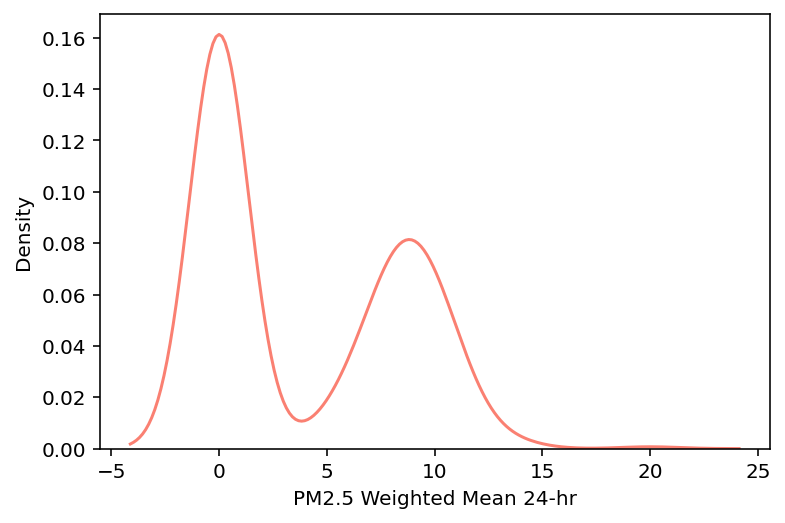

In [23]:
sns.kdeplot(air_con['PM2.5 Weighted Mean 24-hr'], color='salmon')
plt.show()

In [24]:
air_con['State'].value_counts()

 CA       26
 PA       20
 OH       19
 TX       16
 WI       15
          ..
 TN-GA     1
 IN-MI     1
 MO-IL     1
 RI-MA     1
 MD-WV     1
Name: State, Length: 90, dtype: int64

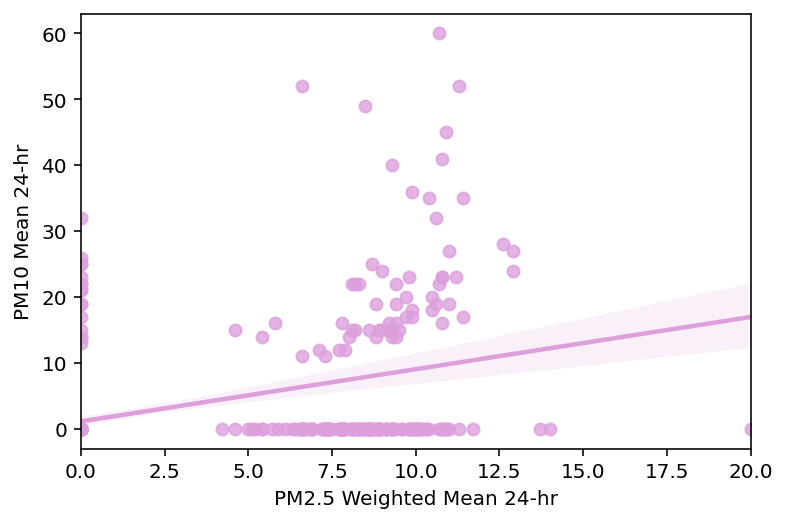

In [25]:
sns.regplot('PM2.5 Weighted Mean 24-hr', 'PM10 Mean 24-hr', data=air_con, color='plum')
plt.show()

In [26]:
import scipy.stats as spst
spst.pearsonr(air_con['PM2.5 Weighted Mean 24-hr'], air_con['PM10 Mean 24-hr'])

(0.37022850557330417, 1.1432386536502208e-14)

- 대체적으로 미세먼지 24시간 평균과 초미세먼지 24시간 가중평균은 양의 상관관계...?

In [27]:
air_con.corr()

,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr
CO 2nd Max 1-hr,1.000000,0.991060,0.149128,0.212771,-0.069678,-0.078968,0.064664,0.055947,0.083034,0.014675,0.015087,0.071554,0.109134
CO 2nd Max 8-hr,0.991060,1.000000,0.150340,0.221057,-0.054745,-0.063434,0.045377,0.040709,0.054279,0.015957,0.016040,0.065951,0.102657
NO2 98th Percentile 1-hr,0.149128,0.150340,1.000000,0.698567,0.198115,0.221528,0.194418,0.203277,0.274681,0.403100,0.412057,0.405649,0.515987
NO2 Mean 1-hr,0.212771,0.221057,0.698567,1.000000,0.306709,0.315140,0.118145,0.115956,0.173380,0.251828,0.242356,0.315765,0.427942
Ozone 2nd Max 1-hr,-0.069678,-0.054745,0.198115,0.306709,1.000000,0.843265,-0.058432,-0.059134,-0.027560,0.023665,0.003198,0.030359,0.071773
Ozone 4th Max 8-hr,-0.078968,-0.063434,0.221528,0.315140,0.843265,1.000000,-0.035407,-0.037093,0.001998,0.094976,0.079684,0.046839,0.089787
SO2 99th Percentile 1-hr,0.064664,0.045377,0.194418,0.118145,-0.058432,-0.035407,1.000000,0.889509,0.841278,0.119338,0.159304,0.178557,0.238815
SO2 2nd Max 24-hr,0.055947,0.040709,0.203277,0.115956,-0.059134,-0.037093,0.889509,1.000000,0.812094,0.124886,0.162665,0.177841,0.224798
SO2 Mean 1-hr,0.083034,0.054279,0.274681,0.173380,-0.027560,0.001998,0.841278,0.812094,1.000000,0.204137,0.229136,0.186333,0.256476
PM2.5 98th Percentile 24-hr,0.014675,0.015957,0.403100,0.251828,0.023665,0.094976,0.119338,0.124886,0.204137,1.000000,0.925335,0.298063,0.363057


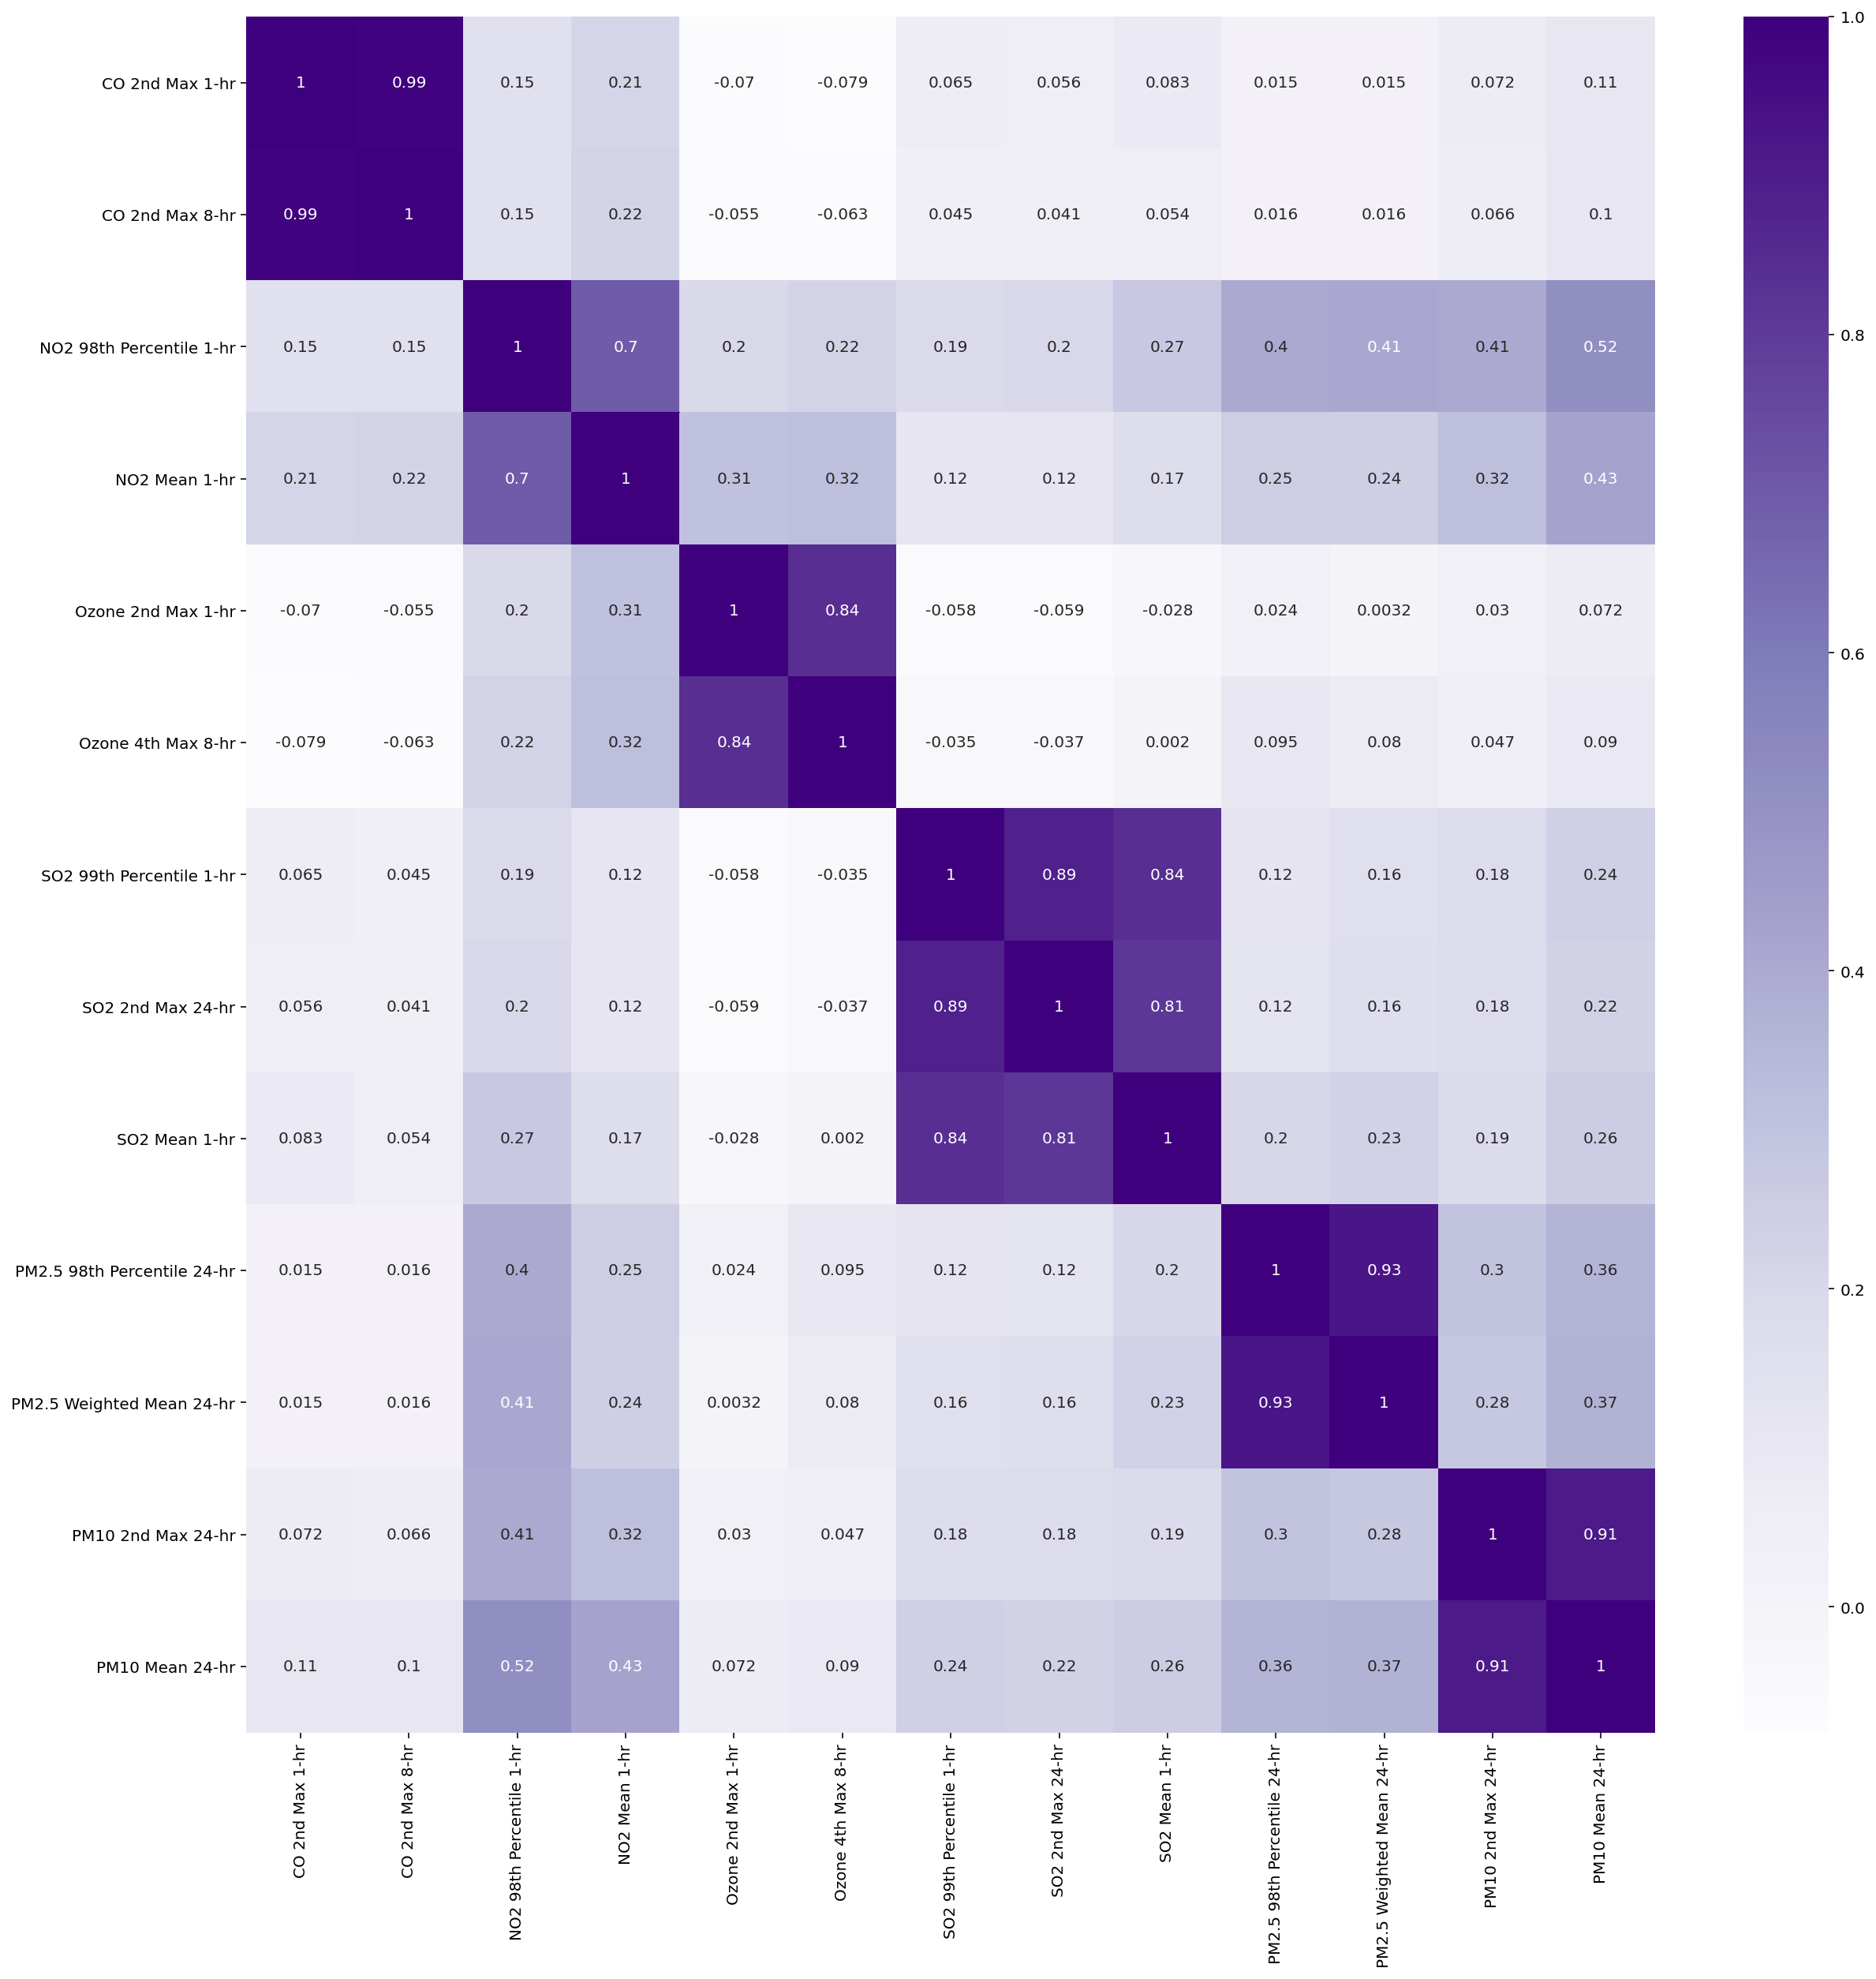

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(air_con.corr(), annot=True, cmap='Purples')
plt.show()

- 24시간동안 측정된 미세먼지 평균(PM10 Mean 24-hr)과 높은 상관관계를 보이는 것


    1. 24시간동안 측정된 미세먼지 두번째 최댓값(PM10 2nd Max 24-hr)
        - 0.91
    2. 1시간동안 측정된 이산화질소 98번째 백분위수(NO2 98th Percentile 1-hr)
        - 0.52
    3. 1시간동안 측정된 이산화질소 평균(NO2 Mean 1-hr)
        - 0.43

## 2. 데이터 전처리

- target = PM10 Mean 24-hr(24시간 동안 측정한 미세먼지 평균)

In [29]:
# x, y 분리
# City는 값이 너무 많아 전처리하면 개수가 너무 많아져 x에서 뺐음
x = air_con.drop(['PM10 Mean 24-hr', 'City'], axis=1)
y = air_con['PM10 Mean 24-hr']

In [30]:
x.shape, y.shape

((407, 13), (407,))

In [31]:
x = pd.get_dummies(x, columns=['State'])

In [32]:
x.head()

,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,...,State_ VA-WV,State_ VT,State_ WA,State_ WI,State_ WI-MN,State_ WV,State_ WV-KY-OH,State_ WV-OH,State_ WY,State_ WY-ID
0,0.0,0.0,0.0,0.0,0.07,0.066,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.08,0.067,5.0,3.0,0.0,24.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,33.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.07,0.062,2.0,1.0,0.0,22.0,...,0,0,0,0,0,0,0,0,0,0
4,2.2,1.0,44.0,8.0,0.09,0.076,3.0,1.0,1.0,28.0,...,0,0,0,0,0,0,0,0,0,0


## 3. Machine Learning (Linear model)

- 다른 모델을 연구해 볼 것입니다.

[참고사이트](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [35]:
x_train.shape, y_train.shape

((325, 102), (325,))

In [36]:
colx = ['CO 2nd Max 1-hr', 'CO 2nd Max 8-hr', 'NO2 98th Percentile 1-hr', 'NO2 Mean 1-hr', 
        'Ozone 2nd Max 1-hr', 'Ozone 4th Max 8-hr', 'SO2 99th Percentile 1-hr', 'SO2 2nd Max 24-hr', 
        'SO2 Mean 1-hr', 'PM2.5 98th Percentile 24-hr', 'PM2.5 Weighted Mean 24-hr', 'PM10 2nd Max 24-hr']

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[colx] = scaler.fit_transform(x_train[colx])
x_test[colx] = scaler.transform(x_test[colx])

In [38]:
x_train.head()

,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,...,State_ VA-WV,State_ VT,State_ WA,State_ WI,State_ WI-MN,State_ WV,State_ WV-KY-OH,State_ WV-OH,State_ WY,State_ WY-ID
278,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.612903,0.229167,0.25,0.000000,...,0,0,0,0,0,0,0,1,0,0
207,0.0,0.0,0.525424,0.172414,0.571429,0.607143,0.000000,0.000000,0.00,0.696970,...,0,0,0,0,0,0,0,0,0,0
127,0.0,0.0,0.000000,0.000000,0.500000,0.580357,0.000000,0.000000,0.00,0.000000,...,0,0,0,1,0,0,0,0,0,0
401,0.0,0.0,0.000000,0.206897,0.571429,0.589286,0.043011,0.041667,0.25,0.621212,...,0,0,0,0,0,0,0,0,0,0
120,0.0,0.0,0.067797,0.034483,0.571429,0.633929,0.000000,0.000000,0.00,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ① Ridge

- 간단하게 설명하자면 alpha 값을 설정해서 회귀계수(coef)의 과적합을 방지해줌
- alpha값이 커질수록 회귀계수는 0에 가까워진다
- [참고 - ridge](https://brunch.co.kr/@itschloe1/11)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
model_rid = Ridge(alpha=0.3, random_state=2022)

In [41]:
model_rid.fit(x_train, y_train)

Ridge(alpha=0.3, random_state=2022)

In [42]:
y_pred = model_rid.predict(x_test)

In [43]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 3.4984
MAE : 2.1294
R2-Score : 0.8795


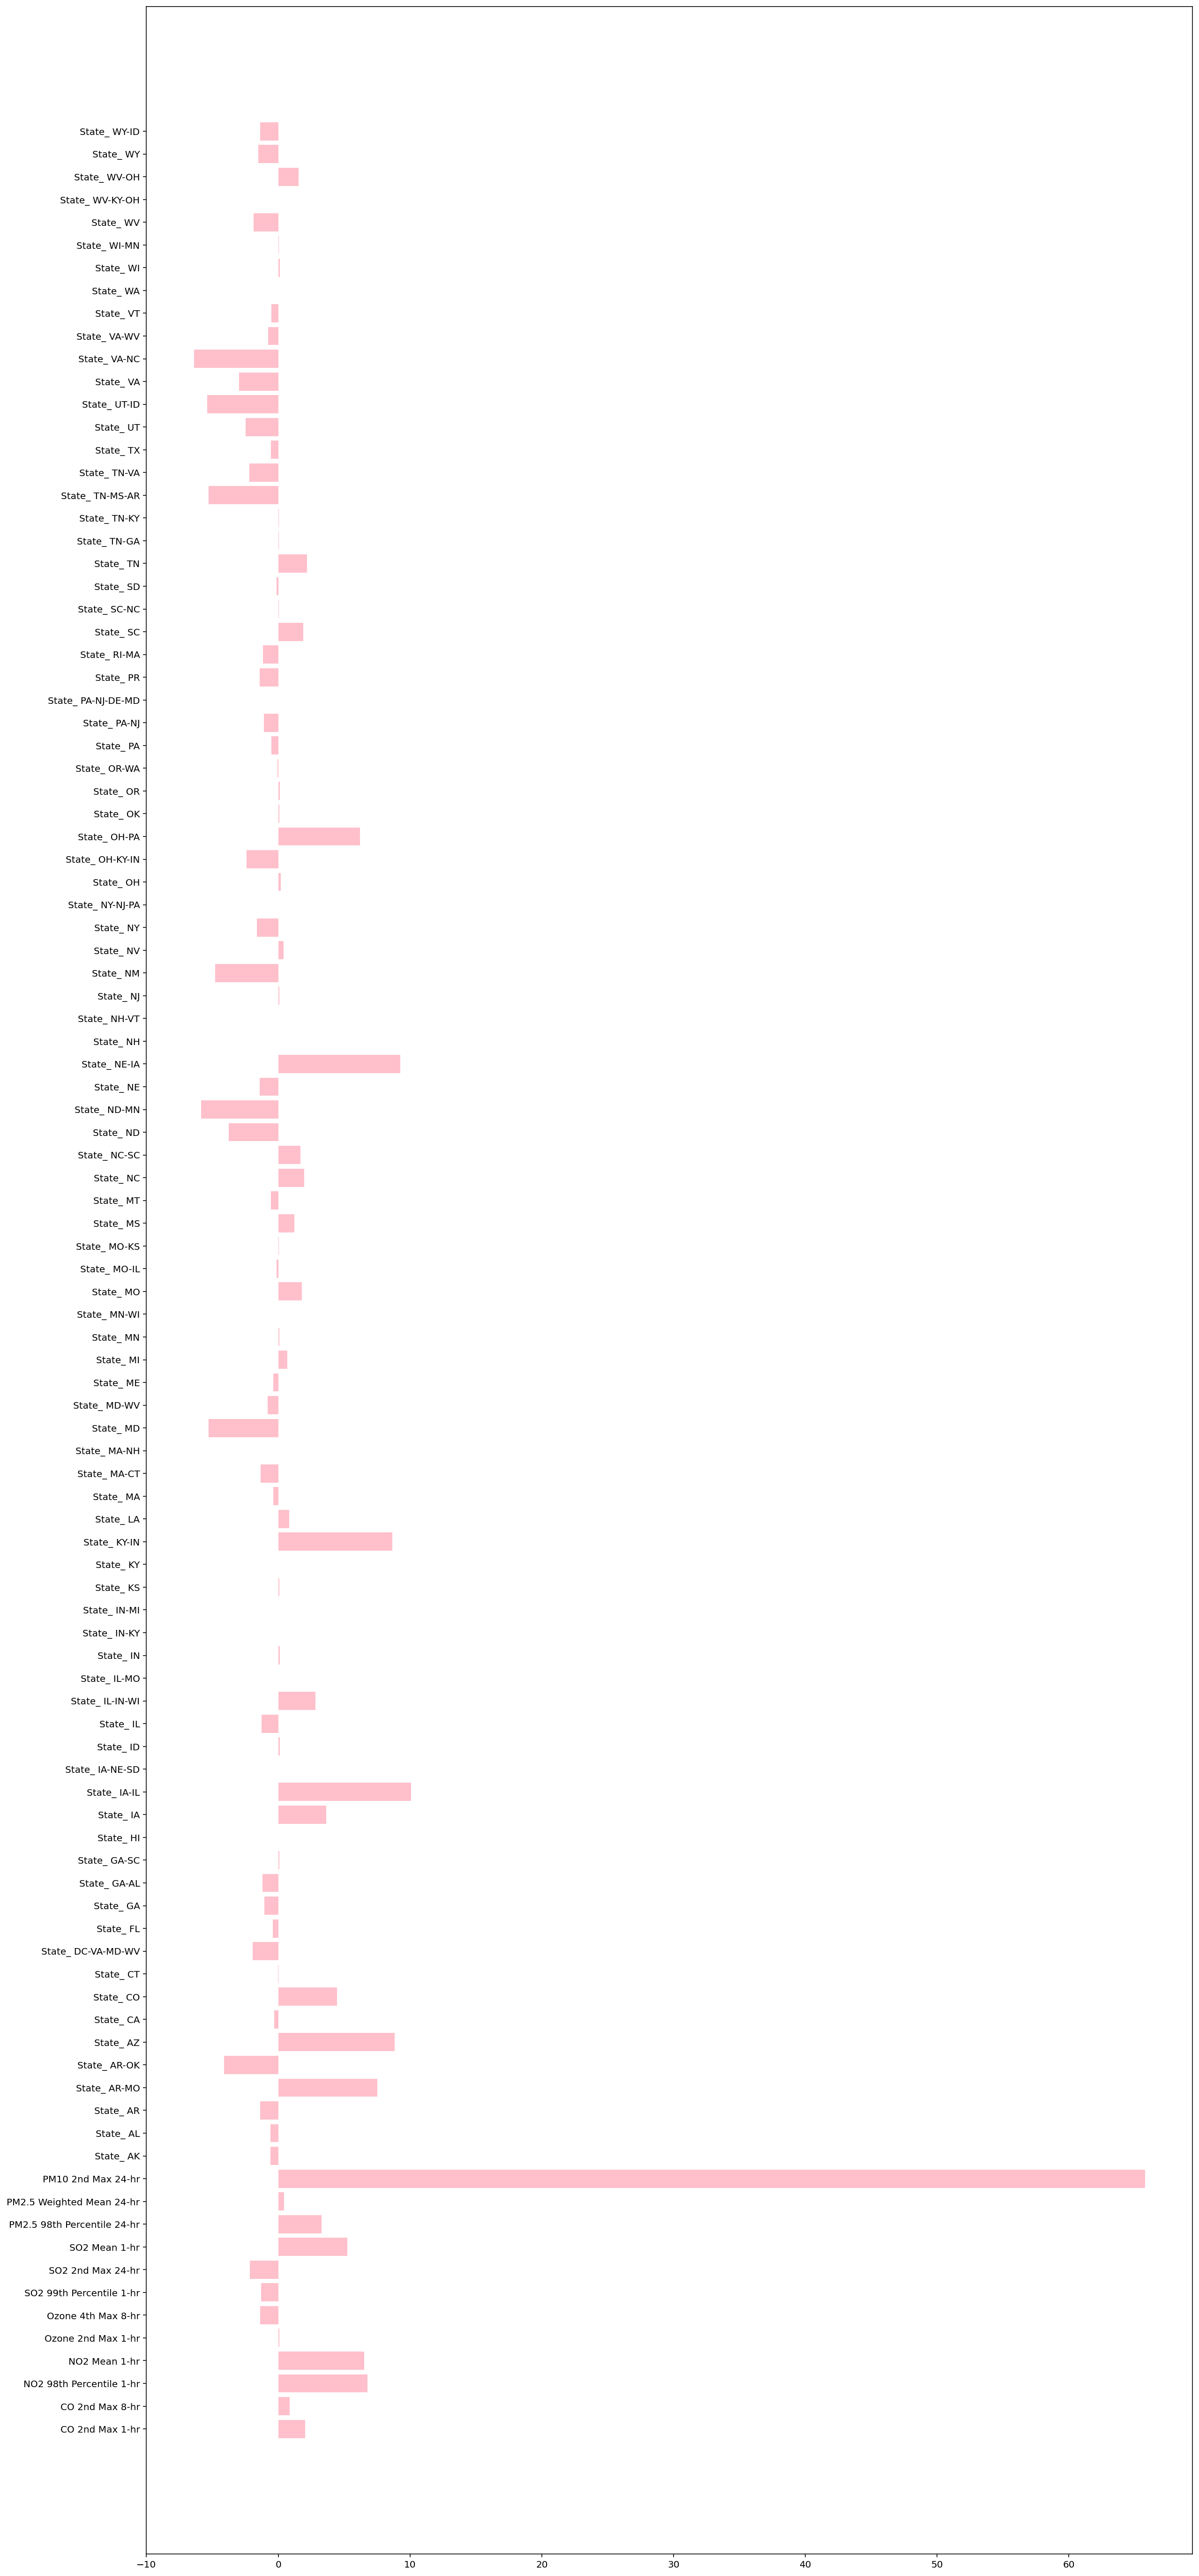

In [44]:
# 회귀계수 시각화
plt.figure(figsize=(20, 50))
plt.barh(x_train.columns, model_rid.coef_, color='pink')
plt.show()

- 다른 것은 회귀계수가 대체로 0 근처지만, PM10 2nd Max 24-hr(24시간동안 미세먼지 두번째 최댓값)의 회귀계수가 60이상으로 엄청 크다. (상관계수가 높아서 그런 것 같다)

In [45]:
score = {}
score['Ridge'] = r2_score(y_test, y_pred)

### ② RidgeCV

- Leave-One-Out Cross Validation*을 사용함
-  <font color=blue>*n개의 데이터에서 1개를 Test Set으로 정하고 나머지 n-1개의 데이터로 모델링을 하는 방법
- <font color=black>사용법은 GridSearchCV와 비슷함

In [46]:
from sklearn.linear_model import RidgeCV

In [47]:
model_rcv = RidgeCV(alphas=np.logspace(0, 1, 5), cv=10, scoring='r2')

In [48]:
model_rcv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ]),
        cv=10, scoring='r2')

In [49]:
y_pred = model_rcv.predict(x_test)

In [50]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 3.7838
MAE : 2.3692
R2-Score : 0.8590


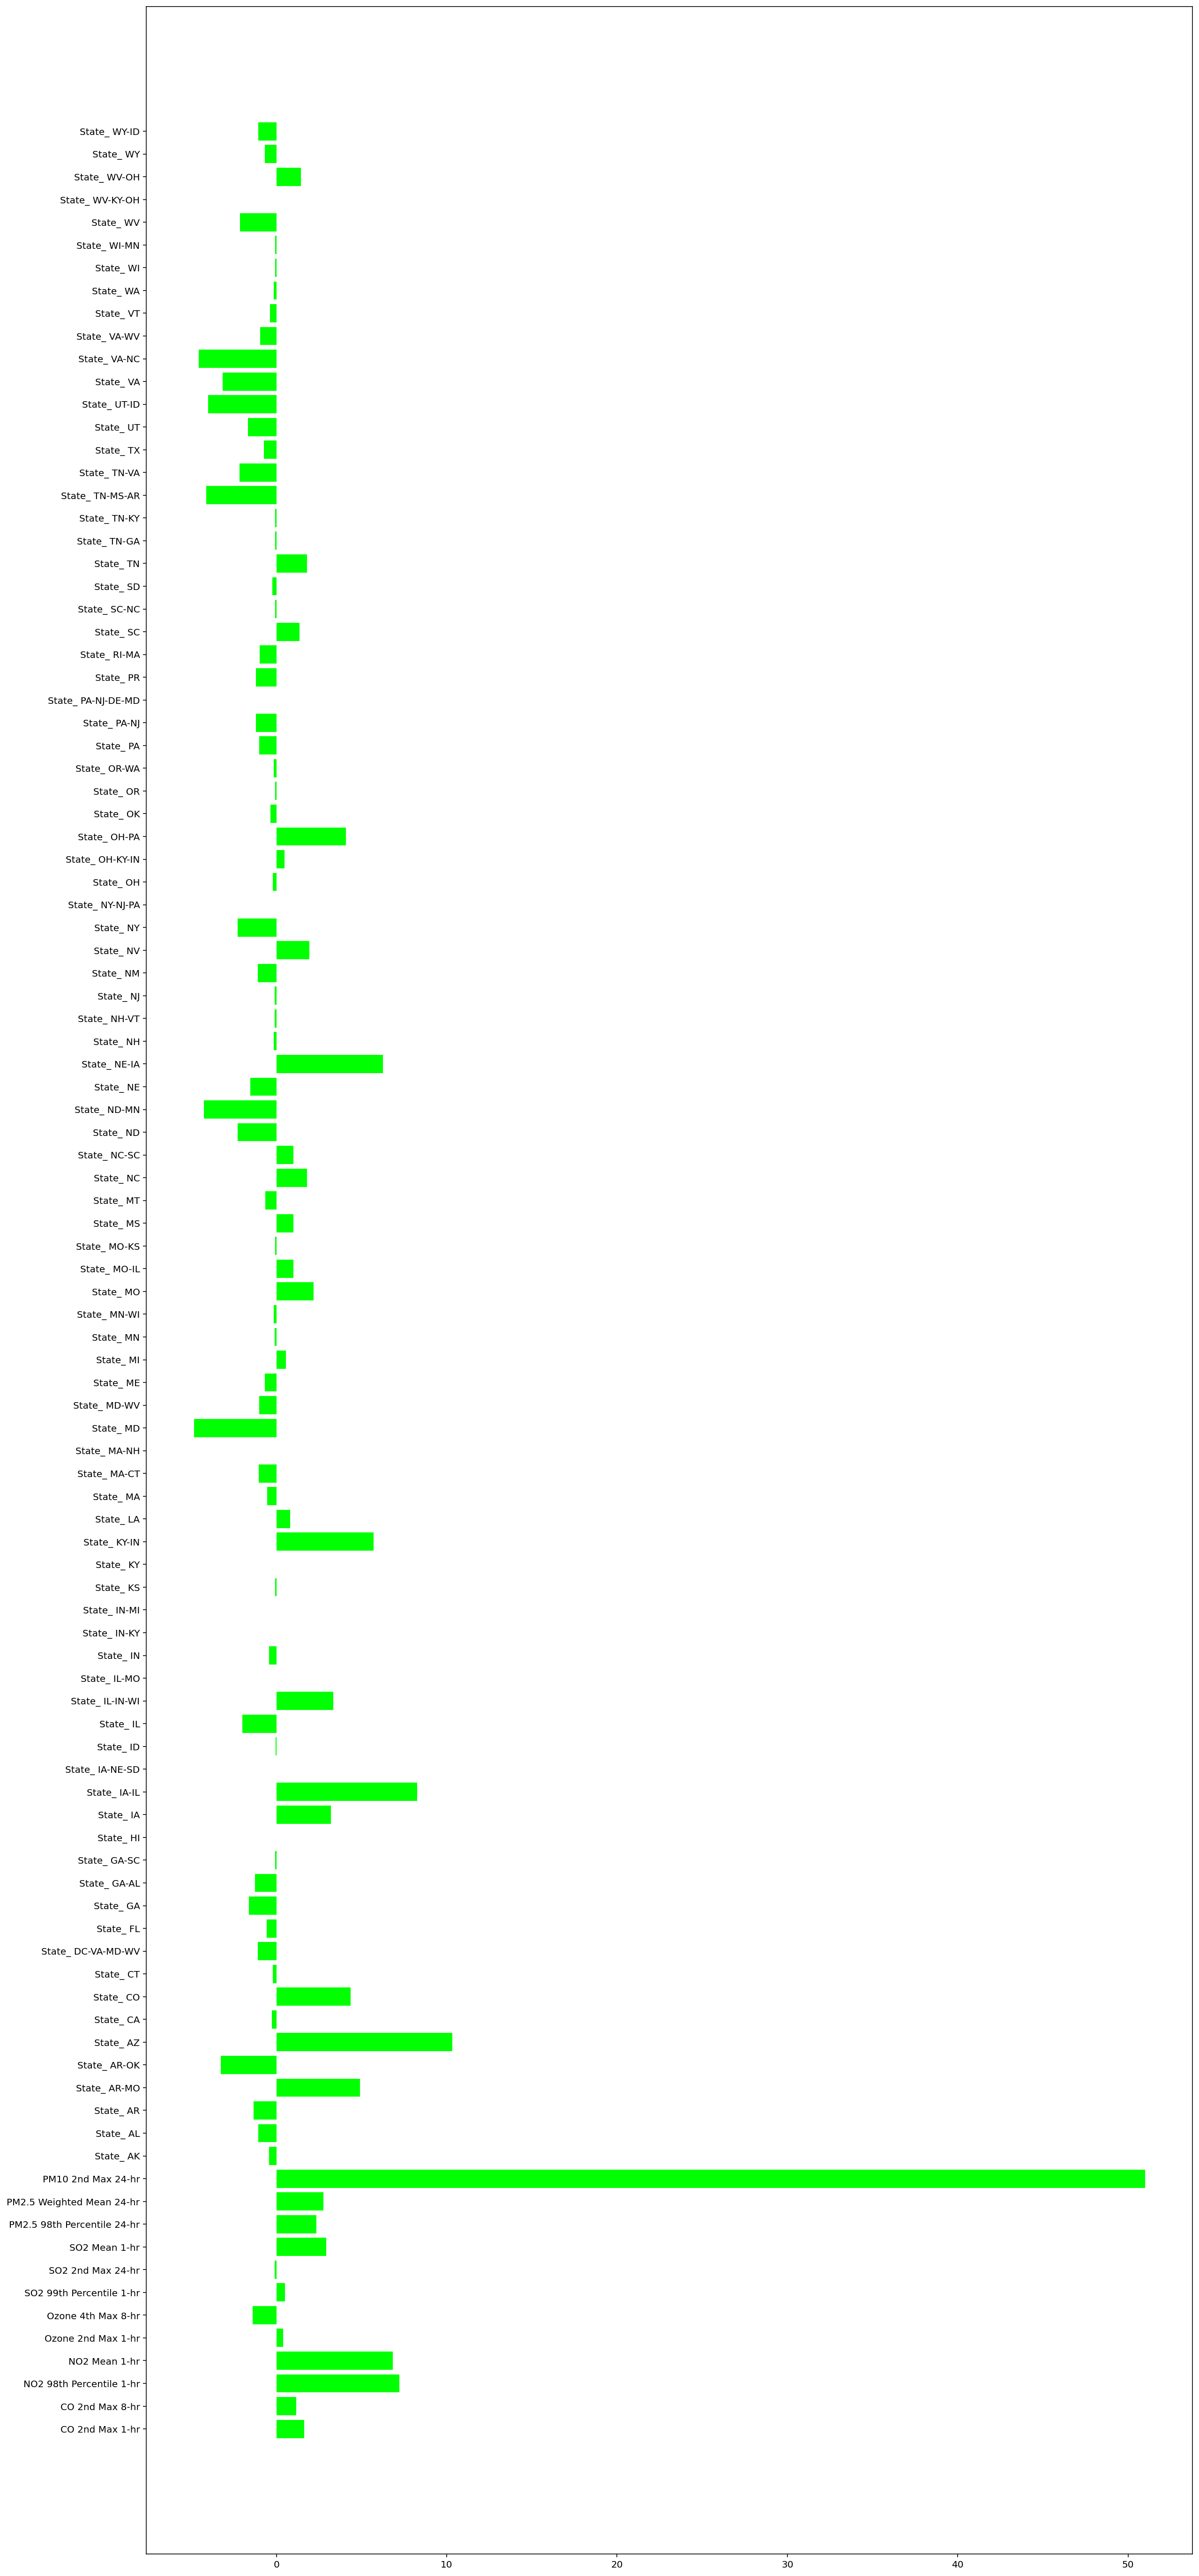

In [51]:
# 회귀계수 시각화
plt.figure(figsize=(20, 50))
plt.barh(x_train.columns, model_rcv.coef_, color='lime')
plt.show()

- 회귀계수는 Ridge와 비슷하다(자세히 보면 약간 다름)

In [52]:
score['RidgeCV'] = r2_score(y_test, y_pred)

### ③ Lasso

- 최소제곱법과 유사
- Lasso를 쓰면 덜 중요한 계수들이 0으로 수렴한다.
[참고 - Lasso](https://modern-manual.tistory.com/22)

In [53]:
from sklearn.linear_model import Lasso

In [54]:
model_las = Lasso(alpha=0.3, random_state=2022)

In [55]:
model_las.fit(x_train, y_train)

Lasso(alpha=0.3, random_state=2022)

In [56]:
y_pred = model_las.predict(x_test)

In [57]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 4.7481
MAE : 3.1553
R2-Score : 0.7780


- Ridge, RidgeCV보다 R2 Score가 낮다

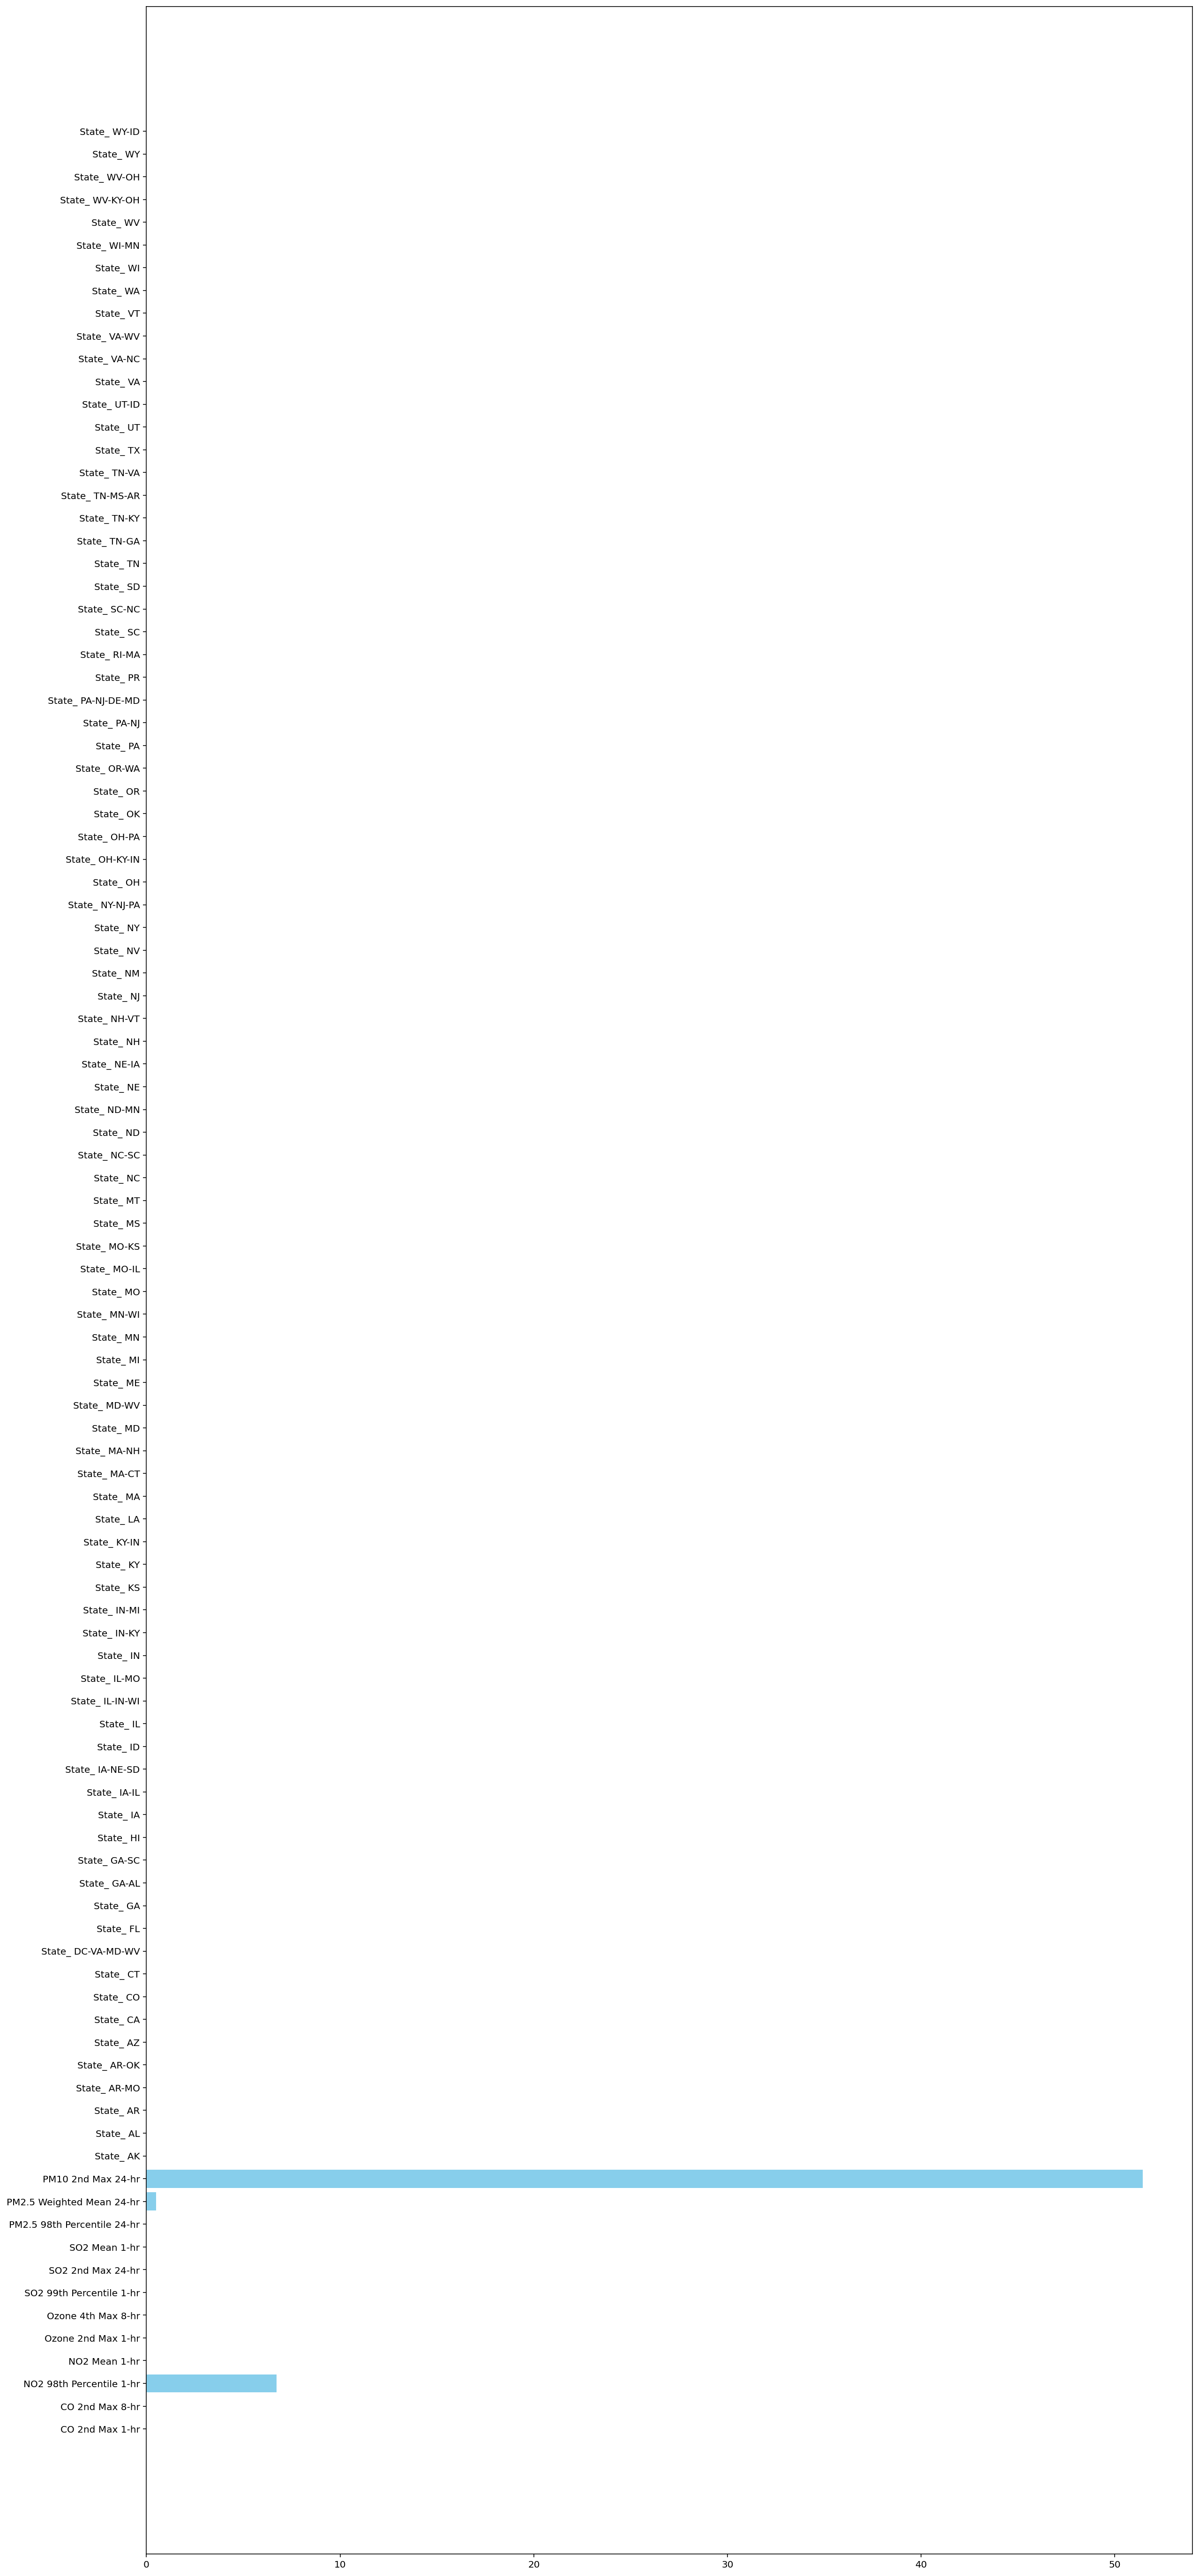

In [58]:
# 회귀계수 시각화
plt.figure(figsize=(20, 50))
plt.barh(x_train.columns, model_las.coef_, color='skyblue')
plt.show()

- 3개의 변수를 빼고는 회귀계수가 거의 0에 수렴한 듯 하다.
- 여기서도 PM10 2nd MAx 24-hr(24시간동안 미세먼지 두번째 최댓값)의 회귀계수가 50이상으로 가장 크다.

In [59]:
score['Lasso'] = r2_score(y_test, y_pred)

### ④ LassoCV

In [60]:
from sklearn.linear_model import LassoCV

In [61]:
model_lcv = LassoCV(cv=10, n_jobs=-1, random_state=2022)

In [62]:
model_lcv.fit(x_train, y_train)

LassoCV(cv=10, n_jobs=-1, random_state=2022)

In [63]:
y_pred = model_lcv.predict(x_test)

In [64]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 3.2638
MAE : 1.8678
R2-Score : 0.8951


In [65]:
score['LassoCV'] = r2_score(y_test, y_pred)

### ⑤ LassoLars

- Lars 알고리즘 이용
- 좌표 강하를 기반으로 한 구현과는 달리 정확한 솔루션을 산출하며, 이는 계수의 놈(norm)의 함수로서 조각별 정의된 선형 모델이다.
- 놈(norm) : 백터의 크기나 길이를 측정하는 방법
- 조각별 정의된 함수 : 불연속적인 함수
           y = x + 2 (x > 0)
           y = 2x (x ≤ 0)
[조각별 정의된 함수](https://dawoum.ddns.net/wiki/Piecewise_linear_function)

- Lars가 최소 각도 회귀 분석을 사용하므로, LassoLars도 이를 사용함

In [66]:
from sklearn.linear_model import LassoLars

In [67]:
model_lls = LassoLars(alpha=0.3, random_state=2022)

In [68]:
model_lls.fit(x_train, y_train)

LassoLars(alpha=0.3, random_state=2022)

In [69]:
y_pred = model_lls.predict(x_test)

In [70]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 7.0659
MAE : 4.9203
R2-Score : 0.5084


In [71]:
score['LassoLars'] = r2_score(y_test, y_pred)

### ⑥ BayesianRidge

- 회귀 문제의 확률 모델을 추정
- Ridge와 비슷함

In [72]:
from sklearn.linear_model import BayesianRidge

In [73]:
model_br = BayesianRidge()

In [74]:
model_br.fit(x_train, y_train)

BayesianRidge()

In [75]:
y_pred = model_br.predict(x_test)

In [76]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 3.4896
MAE : 2.1075
R2-Score : 0.8801


- 회귀계수는 Lasso를 제외하고 나머지 모델들과 비슷

In [77]:
score['BayesianRidge'] = r2_score(y_test, y_pred)

### ⑦ TweedieRegressor

- 일반화 선형 모형(GLM) : 기존 선형회귀 모형에서 반응 변수의 분포를 정규분포, 이항분포, 포아송분포 등으로 확장하고, 기존 반응변수 평균과 설명변수의 선형관계를 반응변수 평균의 함수와 설명변수의 선형 관계로 확장한 모형
[참고 - 일반화 선형 모형](https://zephyrus1111.tistory.com/26)

In [78]:
from sklearn.linear_model import TweedieRegressor

In [79]:
model_twe = TweedieRegressor(alpha=0.3)

In [80]:
model_twe.fit(x_train, y_train)

TweedieRegressor(alpha=0.3)

In [81]:
y_pred = model_twe.predict(x_test)

In [82]:
print('RMSE : {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('MAE : {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE : 8.8591
MAE : 5.8829
R2-Score : 0.2272


- R2 Score이 낮게 나왔다

In [83]:
score['TweedieRegressor'] = r2_score(y_test, y_pred)

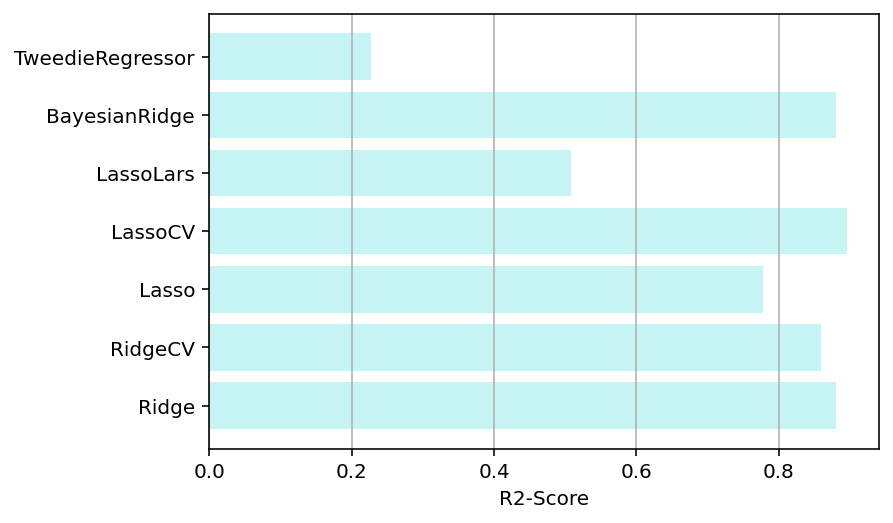

- Ridge: 0.8795
- RidgeCV: 0.8590
- Lasso: 0.7780
- LassoCV: 0.8951
- LassoLars: 0.5084
- BayesianRidge: 0.8801
- TweedieRegressor: 0.2272


In [84]:
plt.barh(list(score.keys()), score.values(), alpha=0.7, color='paleturquoise')
plt.grid(axis='x')
plt.xlabel('R2-Score')
plt.show()

for k, v in score.items() :
    print(f'- {k}: {v:.4f}')

- 최적의 모델 : LassoCV (R2-Score = 0.8951)